# MOVIE RECOMMENDATION

# Introduction

The main goal of this machine learning project is to build a recommendation engine that recommends movies to users.This python project is designed to help you understand the functioning of how a recommendation system works.

# What is a Recommendation System?

A recommendation system provides suggestions to the users through a filtering process that is based on user preferences and browsing history. A recommendation system is a platform that provides its users with various contents based on their preferences and likings. A recommendation system takes the information about the user as an input.




# Contents

1. Introduction
2. What is a Recommendation System?
3. Importing important libraries
4. Reading dataset
5. Missing values imputation
6. Feature Engineering
7. Visualisation
8. Recommending Movies Based on Languages
9. Recommending Movies Based on Actor
10. Recommending movies on similar genres
11. Recommending Similar Movies
12. Conclusion

# Importing Important Libraries

In [1]:
# basic libraries
import pandas as pd
import numpy as np

# basic libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for interactive shells
from IPython.display import display

# for setting background for graph
plt.rcParams["figure.figsize"] = (16,8)
plt.style.use("fivethirtyeight")

# for removing error
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [2]:
# reading dataset
data = pd.read_csv("movie_metadata.csv")

In [3]:
# printing first five line 
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
# checking shape of our dataset
print(data.shape)

(5043, 28)


In [5]:
# printing inforamtion of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
# removing unnecassary columns form our dataset
data = data.drop(["color","director_facebook_likes","actor_3_facebook_likes","cast_total_facebook_likes",
                 "facenumber_in_poster","content_rating","country","movie_imdb_link","aspect_ratio","plot_keywords"],
                axis=1)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'actor_3_name',
       'num_user_for_reviews', 'language', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

# Missing values imputation

In [7]:
# checking the rows having high percentage of missing values in our dataset
round(100*(data.isnull().sum()/len(data.index)),2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
actor_1_facebook_likes     0.14
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
actor_2_facebook_likes     0.26
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [8]:
# since gross and budget columns having large number of nan value so we will remove these two columns from our dataset
data=data[~np.isnan(data["gross"])]
data = data[~np.isnan(data["budget"])]

In [9]:
# again checking the nan values
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
actor_1_facebook_likes     3
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
actor_2_facebook_likes     5
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [10]:
# the rows foe which the sum of nan is less than two are retained
data = data[data.isnull().sum(axis=1) <=2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              0
actor_1_facebook_likes    0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              5
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
actor_2_facebook_likes    0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [11]:
# lets fill the nan values
# we are remvoving nan value of numerical columns by mean
data["num_critic_for_reviews"].fillna(data["num_critic_for_reviews"].mean(),inplace=True)
# we are remvoving nan value of categorical columns by mode
data["duration"].fillna(data["duration"].mean(),inplace=True)
# we know that we can not use statistical values for removing the missing 
data["language"].fillna(data["language"].mode()[0],inplace =True)
data["actor_3_name"].fillna("Unknown Actor",inplace = True)
data.isnull().sum().sum()

0

# Feature Engineering

In [12]:
# here we are convert the gross and budget from $ to million $ to make our analysis easier
data["gross"] = data["gross"]/1000000
data["budget"] = data["budget"]/1000000

In [13]:
# here we are creating a profit column using thr bydget and gross
data["profit"] = data["gross"] - data["budget"]
# here we are checking the name of top 10 profitable movies
data[["profit","movie_title"]].sort_values(by = "profit",ascending=False).head(10)

,profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [14]:
# by looking at the above result we can easily analyze that there are some duplicate
# here we are printing the no.of rows before removing duplicates
print("No of rows before removing duplicates:", data.shape[0])
# here we are removing all the duplicates from the data
data.drop_duplicates(subset = None,keep="first",inplace=True)
# here we are printing the no.of rows after removing duplicates
print("No of rows after removing duplicates:", data.shape[0])

No of rows before removing duplicates: 3886
No of rows after removing duplicates: 3851


In [15]:
# here we are checking top 10 profitable movies again
data[["movie_title","profit"]].sort_values(by ="profit",ascending = False).head(10)

,movie_title,profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


In [16]:
# here we are checking the values in the language column
data["language"].value_counts()

English       3672
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Danish           3
Thai             3
Persian          3
Hebrew           2
Aboriginal       2
Dari             2
Indonesian       2
Vietnamese       1
Telugu           1
Arabic           1
Kazakh           1
Hungarian        1
Maya             1
Czech            1
Russian          1
Bosnian          1
Romanian         1
None             1
Icelandic        1
Zulu             1
Aramaic          1
Mongolian        1
Swedish          1
Dzongkha         1
Filipino         1
Name: language, dtype: int64

In [17]:
# looking at the above output we can easily observe that out of 3500 movies only 150 movies are of other than english
# so it is better to keep only two languages that is english and foregin
def language(x):
    if x == "English":
        return "English"
    else:
        return "Foregin"
# here we are applying the function on the language column
data['language'] = data["language"].apply(language)
# here we checking values again
data["language"].value_counts()

English    3672
Foregin     179
Name: language, dtype: int64

In [18]:
# the duration of movies is not varying a lot but we know that most of the users either like watching long or short duration movie.
# duration movies we can categorise the movie in two part i.e. short and long
# here we are defining a function for categorizing duration of movies
def duration(x):
    if x <= 120:
        return "short"
    else:
        return "Long"
# here we are applying this function on the duration column
data["duration"] = data["duration"].apply(duration)
# here er are checking the values of duration column
data['duration'].value_counts()

short    2934
Long      917
Name: duration, dtype: int64

In [19]:
# here we are spliting genres
data["genres"].str.split("|")[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [20]:
# we can see from the above cell that most of the movies are having a lot of genres
# also a movie can have so many genres so lets keep four genres
data["Moviegenres"] = data["genres"].str.split("|")
data['genres1'] = data["Moviegenres"].apply(lambda x: x[0])
# some of the movies have only one genre in such case assign the some genres to genres_2 as well
data['genres2'] = data["Moviegenres"].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['genres3'] = data["Moviegenres"].apply(lambda x:x[2] if len(x) > 2 else x[0])
data['genres4'] = data["Moviegenres"].apply(lambda x:x[3] if len(x) > 3 else x[0])
# here we are checking the head of the data
data[["genres","genres1","genres2","genres3","genres4"]].head(5)

,genres,genres1,genres2,genres3,genres4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


# Data Visualisation

   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


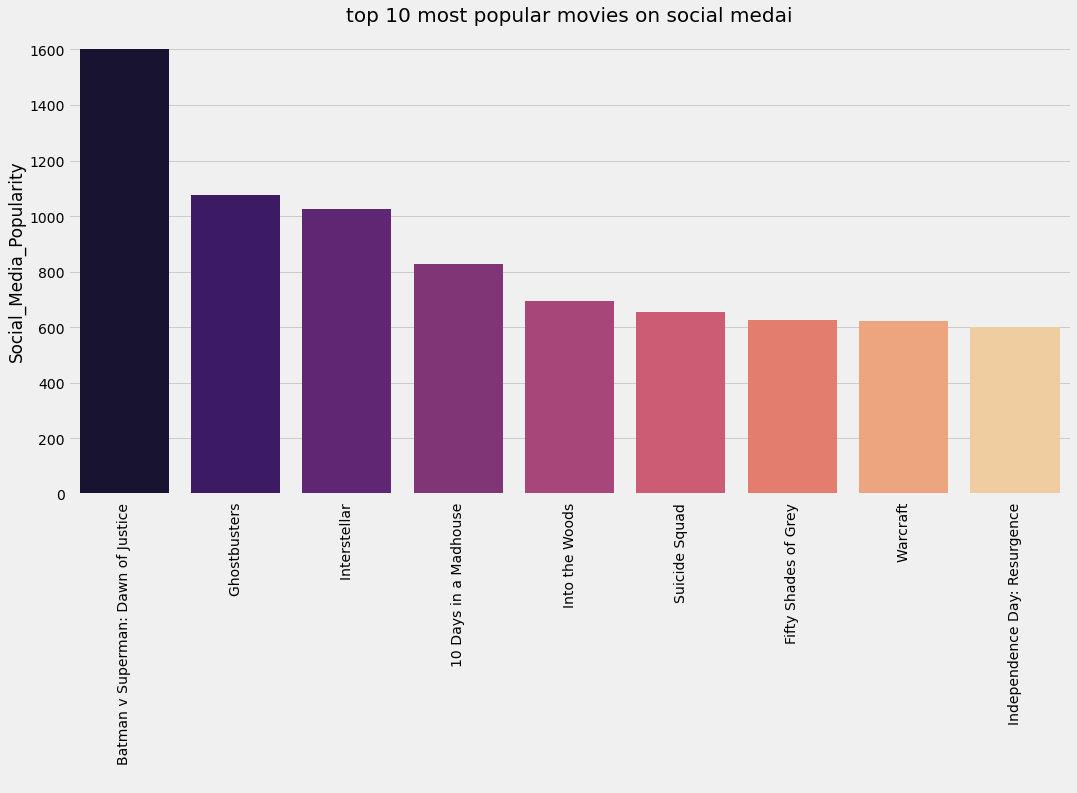

In [21]:
# here we are calculating the social media popularity of movie
# to calculate popularity of a movie we can aggregate no of voted users no of users for reviews and facebook
data["Social_Media_Popularity"] = (data["num_user_for_reviews"]/
                                   data["num_voted_users"])*data["movie_facebook_likes"]
# here we are checking top 10 most popular movies on social media
x = data[["movie_title",'Social_Media_Popularity']].sort_values(by = "Social_Media_Popularity",
                                                               ascending=False).head(10).reset_index()
print(x)
sns.barplot(x["movie_title"],x["Social_Media_Popularity"],palette="magma")
plt.title("top 10 most popular movies on social medai",fontsize=20)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel(" ")
plt.show()

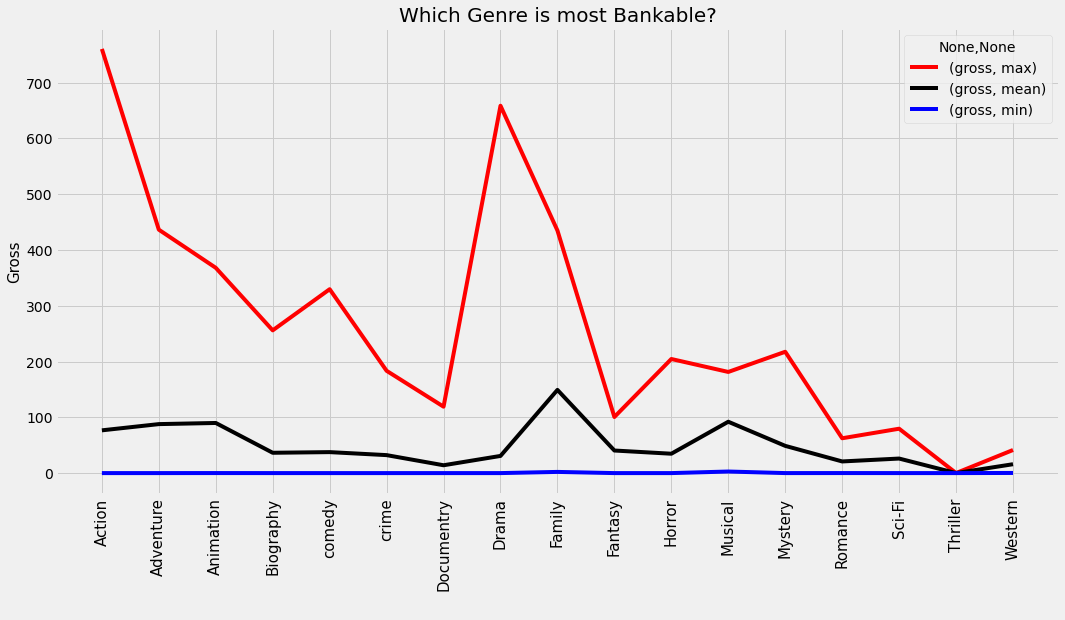

The most profitable movie from each genre


,genres1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [22]:
# here we are comparing the gross with genres
# first group the genres and get max,min and avg gross of the movies of that genres
display(data[["genres1","gross",]].groupby(["genres1"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="Blues"))
# here we are ploting these values using lineplot
data[["genres1","gross",]].groupby(["genres1"]).agg(["max",'mean',"min"]).plot(kind="line",color =["red","black","blue"])
plt.title("Which Genre is most Bankable?", fontsize=20)
plt.xticks(np.arange(17),["Action","Adventure","Animation","Biography","comedy",'crime',
                          "Documentry","Drama","Family","Fantasy","Horror","Musical",
                          "Mystery","Romance","Sci-Fi","Thriller","Western"],rotation=90,fontsize=15)
plt.ylabel("Gross",fontsize=15)
plt.xlabel(" ")
plt.show()
print("The most profitable movie from each genre")
display(data.loc[data.groupby(data["genres1"])["profit"].idxmax()][["genres1",
                                                                  "movie_title","gross"]].style.background_gradient(cmap="copper"))

most profitable years in box office


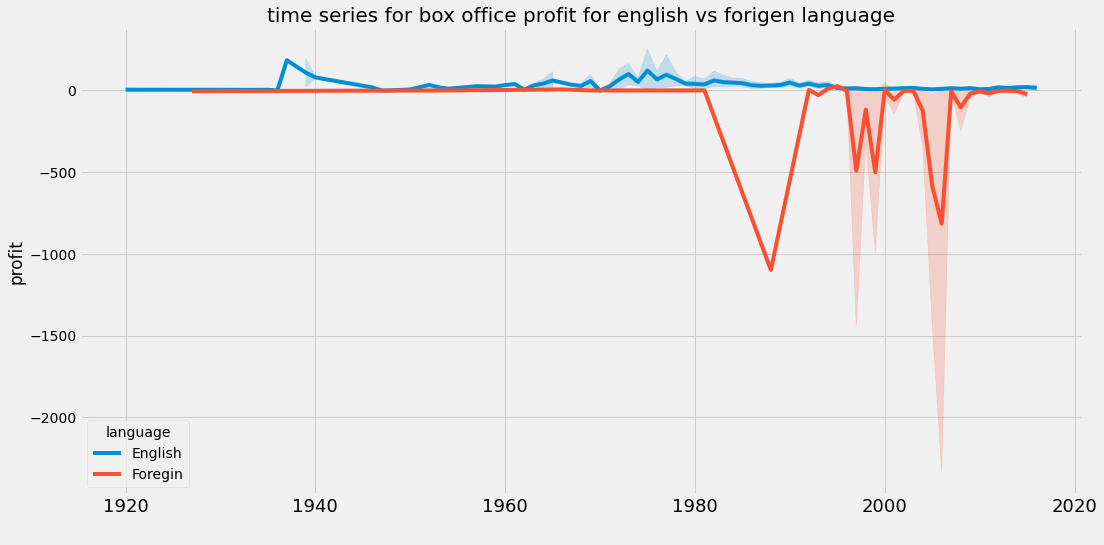

movies that msde huge losses


,movie_title,language,profit
2323,Princess Mononoke,Foregin,-2397.701809
2334,Steamboy,Foregin,-2127.109510
2988,The Host,Foregin,-12213.298588
3005,Fateless,Foregin,-2499.804112
3859,Lady Vengeance,Foregin,-4199.788333


In [23]:
# here we are converting year into integer
data['title_year'] = data["title_year"].astype("int")
print('most profitable years in box office')
display(data[["title_year",'language','profit']].groupby(["language",
                                                         "title_year"]).agg("sum").sort_values(by="profit",
                                                          ascending = False).head(10).style.background_gradient(cmap='Greens'))
# here we are plotting them
sns.lineplot(data["title_year"],data['profit'],hue=data["language"])
plt.title("time series for box office profit for english vs forigen language",fontsize=20)
plt.xticks(fontsize=18)
plt.xlabel(" ")
plt.show()
print("movies that msde huge losses")
display(data[data["profit"]< -2000][["movie_title",
                                    "language","profit"]].style.background_gradient(cmap="Reds"))

,movie_title,duration,gross,profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547


,movie_title,duration,gross,profit
3080,E.T. the Extra-Terrestrial,short,434.949459,424.449459
509,The Lion King,short,422.783777,377.783777
812,Deadpool,short,363.024263,305.024263
521,Despicable Me 2,short,368.049635,292.049635
338,Finding Nemo,short,380.838870,286.838870


Text(0.5, 1.0, 'gross comparsion')

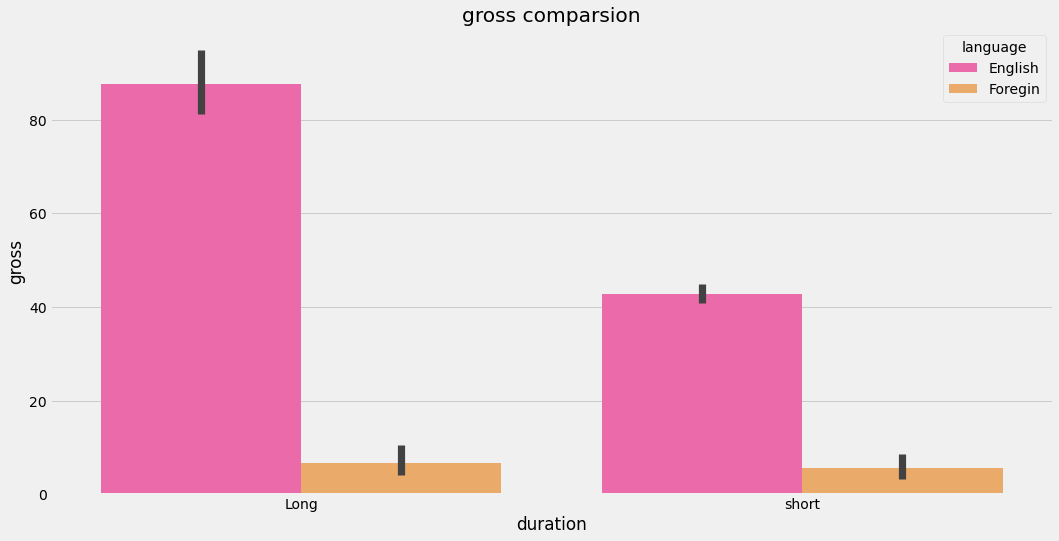

In [24]:
display(data[data["duration"]=="Long"][["movie_title","duration","gross",
                                       "profit"]].sort_values(by="profit", ascending= False).head(5).style.background_gradient(cmap="spring"))
display(data[data["duration"]=="short"][["movie_title","duration","gross",
                                       "profit"]].sort_values(by="profit", ascending= False).head(5).style.background_gradient(cmap="spring"))
sns.barplot(data["duration"],data["gross"],hue= data["language"],palette="spring")
plt.title("gross comparsion")

average IMDB score for long duration movie is 7.06
average TMDB score for short duration movie is 6.28

hightest rated long duration movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

hightest rated short duration movie
               movie_title  imdb_score
3175  American History X          8.6


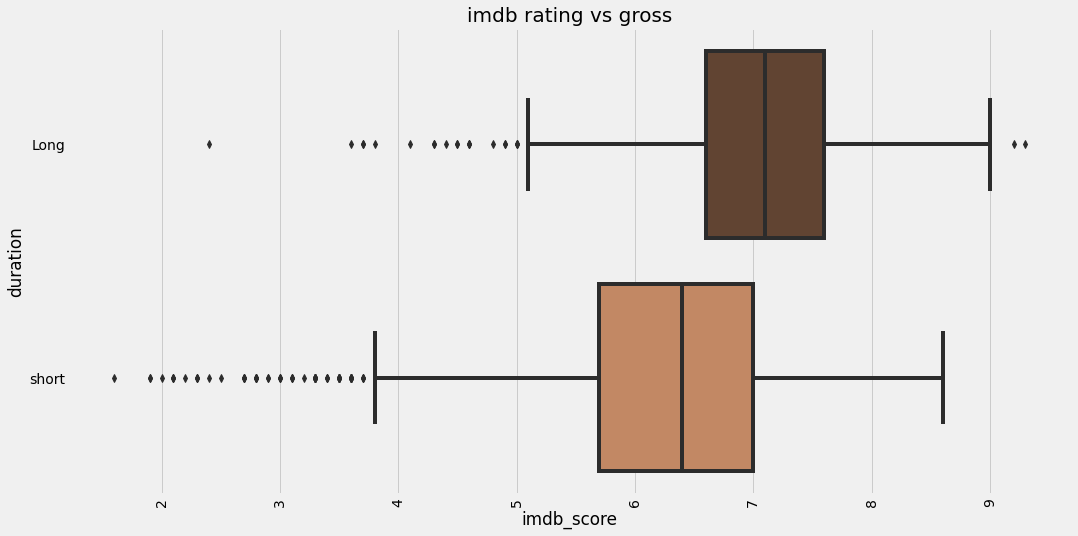

In [25]:
print("average IMDB score for long duration movie is {0:.2f}".format(data[data["duration"]=="Long"]["imdb_score"].mean()))
print("average TMDB score for short duration movie is {0:.2f}".format(data[data["duration"]== "short"]["imdb_score"].mean()))
print("\nhightest rated long duration movie\n",
     data[data["duration"]=="Long"][["movie_title","imdb_score"]].sort_values(by="imdb_score",ascending=False).head(1))
print("\nhightest rated short duration movie\n",
     data[data["duration"]=="short"][["movie_title",'imdb_score']].sort_values(by="imdb_score",ascending=False).head(1))
sns.boxplot(data["imdb_score"],data["duration"],palette="copper")
plt.title("imdb rating vs gross", fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [26]:
def query_actors(x):
    a = data[data["actor_1_name"]==x]
    b = data[data["actor_2_name"]==x]
    c = data[data["actor_3_name"]==x]
    x = a.append(b)
    y = x.append(c)
    y = y[["movie_title",
          "budget",
          "gross",
          "title_year",
          "genres",
          "language",
          "imdb_score",
          ]]
    return y

In [27]:
query_actors("Meryl Streep")

,movie_title,budget,gross,title_year,genres,language,imdb_score
410,It's Complicated,85.0,112.703470,2009,Comedy|Drama|Romance,English,6.6
1106,The River Wild,45.0,46.815748,1994,Action|Adventure|Crime|Thriller,English,6.3
1204,Julie & Julia,40.0,94.125426,2009,Biography|Drama|Romance,English,7.0
1408,The Devil Wears Prada,35.0,124.732962,2006,Comedy|Drama|Romance,English,6.8
1483,Lions for Lambs,35.0,14.998070,2007,Drama|Thriller|War,English,6.2
1575,Out of Africa,31.0,87.100000,1985,Biography|Drama|Romance,English,7.2
1618,Hope Springs,30.0,63.536011,2012,Comedy|Drama|Romance,English,6.3
1674,One True Thing,30.0,23.209440,1998,Drama,English,7.0
1925,The Hours,25.0,41.597830,2002,Drama|Romance,English,7.6
2781,The Iron Lady,13.0,29.959436,2011,Biography|Drama|History,English,6.4


In [28]:
def actors_report(x):
    a = data[data["actor_1_name"]==x]
    b = data[data["actor_2_name"]==x]
    c = data[data["actor_3_name"]==x]
    x = a.append(b)
    y = x.append(c)
    print("Time:",y["title_year"].min(),y["title_year"].max())
    print("Max Gross:{0:.2f} Millions".format(y["gross"].max()))
    print("Avg gross:{0:.2f} Millions".format(y["gross"].mean()))
    print("Min Gross:{0:.2f} Millions".format(y["gross"].min()))
    print("number of 100 Millions Movies:",y[y["gross"]>100].shape[0])
    print("Aug IMDB Score: {0:.2f}".format(y["imdb_score"].mean()))
    print("most common Genres:\n",y["genres1"].value_counts().head())
actors_report("Meryl Streep")

Time: 1985 2014
Max Gross:143.70 Millions
Avg gross:55.23 Millions
Min Gross:9.66 Millions
number of 100 Millions Movies: 4
Aug IMDB Score: 6.81
most common Genres:
 Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: genres1, dtype: int64


In [29]:
# here we are comparing brad pitt, leonardo caprio, and Tom cruise
def critically_acclaimed_actors(x):
    a = data[data["actor_1_name"]==x]
    b = data[data["actor_2_name"]==x]
    c = data[data["actor_3_name"]==x]
    x = a.append(b)
    y = x.append(c)
    return y["num_critic_for_reviews"].sum().astype("int")
print("number of critic reviews for brad pitt")
display(critically_acclaimed_actors("Brad Pitt"))
print("number of critic reviews for Tom Cruise")
display(critically_acclaimed_actors("Tom Cruise"))
print("number of critic reviews for Leonardo DiCaprio")
display(critically_acclaimed_actors("Leonardo DiCaprio"))

number of critic reviews for brad pitt


7814

number of critic reviews for Tom Cruise


6740

number of critic reviews for Leonardo DiCaprio


7014

In [30]:
# here we are printing movie based of imdb score using jypter widgets
@interact
def show_movies_more_than(columns="imdb_score",score=9.0):
    x = data.loc[data[columns]>score][["title_year","movie_title",
                                    "director_name",
                                    "actor_1_name",
                                     "actor_2_name",
                                     "actor_3_name",
                                     "profit",
                                     "imdb_score",
                                     ]]
    x = x.sort_values(by = "imdb_score",ascending=False)
    x = x.drop_duplicates(keep="first")
    return x

interactive(children=(Text(value='imdb_score', description='columns'), FloatSlider(value=9.0, description='sco…

In [31]:
pd.set_option("max_rows",30000)
@interact
def show_articles_more_than(column=["budget","gross"],x=1000):
    return data.loc[data[column]>x][["movie_title","duration","gross","profit","imdb_score"]]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

# Recommending Movies Based on Languages

In [32]:
def recommend_lang(x):
    y = data[["language",'movie_title',"imdb_score"]][data["language"] == x]
    y = y.sort_values(by="imdb_score",ascending=False)
    return y.head(15)

In [33]:
recommend_lang("Foregin")

,language,movie_title,imdb_score
4498,Foregin,"The Good, the Bad and the Ugly",8.9
4747,Foregin,Seven Samurai,8.7
4029,Foregin,City of God,8.7
2373,Foregin,Spirited Away,8.6
4259,Foregin,The Lives of Others,8.5
4921,Foregin,Children of Heaven,8.5
3931,Foregin,Samsara,8.5
1298,Foregin,Amélie,8.4
2323,Foregin,Princess Mononoke,8.4
1329,Foregin,Baahubali: The Beginning,8.4


In [34]:
recommend_lang("English")

,language,movie_title,imdb_score
1937,English,The Shawshank Redemption,9.3
3466,English,The Godfather,9.2
2837,English,The Godfather: Part II,9.0
66,English,The Dark Knight,9.0
3355,English,Pulp Fiction,8.9
1874,English,Schindler's List,8.9
339,English,The Lord of the Rings: The Return of the King,8.9
683,English,Fight Club,8.8
270,English,The Lord of the Rings: The Fellowship of the R...,8.8
2051,English,Star Wars: Episode V - The Empire Strikes Back,8.8


# Recommending Movies Based on Actor

In [35]:
def recommend_movies_on_actors(x):
    a = data[["movie_title","imdb_score"]][data["actor_1_name"]==x]
    b = data[["movie_title","imdb_score"]][data["actor_2_name"]==x]
    c = data[["movie_title","imdb_score"]][data["actor_3_name"]==x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = "imdb_score",ascending=False)
    return a.head(15)

In [36]:
recommend_movies_on_actors("Tom Cruise")

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
671,Eyes Wide Shut,7.3


# Recommending movies on similar genres

In [37]:
from mlxtend.preprocessing import TransactionEncoder
x = data["genres"].str.split("|")
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x,columns=te.columns_)
x.head()

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
genres = x.astype("int")
genres.head()

In [ ]:
genres.insert(0, "movie_title",data["movie_title"])
genres.head(8)

In [ ]:
genres = genres.set_index("movie_title")
genres.head()

In [ ]:
def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)

In [ ]:
recommendation_genres("Action")

In [ ]:
x = genres.transpose()
x.head()

#  Recommending Similar Movies

In [ ]:
def recommendation_movie(movie):
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [ ]:
recommendation_movie("The Expendables")

# Conclusion

Thanks for reading. I hope you like my recoomendation and visualization found it to be helpful. If you have any questions or suggestions, feel free to write them down in the comment section.